In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drugData = pd.read_csv(mouse_drug_data_to_load, encoding = "ISO-8859-1")
clinicalData = pd.read_csv(clinical_trial_data_to_load, encoding = "ISO-8859-1")
# Combine the data into a single dataset
tumorData = pd.merge(clinicalData,drugData,how='inner',on='Mouse ID')


tumorData = tumorData [(tumorData["Drug"] == 'Capomulin') |
                       (tumorData["Drug"] == 'Infubinol') |
                       (tumorData["Drug"] == 'Ketapril') |
                       (tumorData["Drug"] == 'Placebo')
                      ]
# Display the data table for preview
tumorData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
meanTumor = pd.DataFrame(tumorData.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'])
#meanTumor.reset_index()


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

stdErrTumor = pd.DataFrame(tumorData.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'])
stdErrTumor.reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
#meanTumor is stacked data (hierarchial index).
# Each row corresponds to one row. 
#With DataFrame.stack and DataFrame.unstack, we can toggle between
#hierarchical indices and hierarchical columns. 
#unstack to hierarchial columns
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

#meanTumor is now hierarchial columns

# MultiIndex(levels=[['Tumor Volume (mm3)'], ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']],
#            labels=[[0, 0, 0, 0], [0, 1, 2, 3]],
#            names=[None, 'Drug'])
meanTumor = meanTumor.unstack(level = 0)
meanTumor.columns = meanTumor.columns.get_level_values(1)
meanTumor

#####   **************** IMPORTANT  ***************  ############
#need to do this to match or align with meanTumor in plot
stdErrTumor = stdErrTumor.unstack(level = 0)
stdErrTumor.columns = stdErrTumor.columns.get_level_values(1)
stdErrTumor

##############  dont delete above  #############################

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [5]:
meanTumor.columns  #this assignment focuses only 4 treatments

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

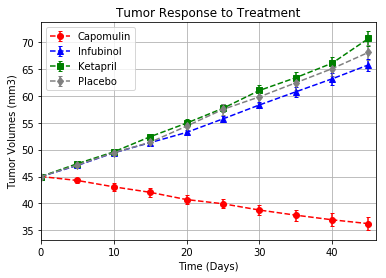

<Figure size 7200x3600 with 0 Axes>

In [6]:
xvals = meanTumor.index #timepoints

#nice information on markers
# https://stackoverflow.com/questions/8409095/matplotlib-set-markers-for-individual-points-on-a-line
markers = ['o','^','s','d']

#information on colors
# https://images.search.yahoo.com/search/images;_ylt=AwrEwhUy1qpcWs8AROBXNyoA;_ylu=X3oDMTEycWNsbGxlBGNvbG8DYmYxBHBvcwMxBHZ0aWQDQjY4OThfMQRzZWMDc2M-?p=color+matplotlib+pandas&fr=mcafee#id=2&iurl=https%3A%2F%2Fpython-graph-gallery.com%2Fwp-content%2Fuploads%2F100_Color_names_python.png&action=click
colors = ['r','b','g','grey']

pos = 0

fig, axis = plt.subplots()

for col in meanTumor.columns:   
    axis.errorbar(xvals,meanTumor[col],stdErrTumor[col],
                  marker = markers[pos],
                  color = colors[pos],
                  linestyle = '--', 
                  capthick = 1,
                  capsize = 2
                 )
 
    pos += 1  #tracker for colors and markers

axis.set_xlim(0, xvals.max()+1)
axis.set_xlabel("Time (Days)")

axis.set_ylim(min(meanTumor.min()-3), max(meanTumor.max()+3))
axis.set_ylabel("Tumor Volumes (mm3)")

axis.grid()
plt.legend(loc="best")
plt.title('Tumor Response to Treatment')
plt.figure(figsize = (100,50))

plt.show()

In [7]:
#plt.savefig("../Images/sin_cos_with_markers.png")

In [8]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


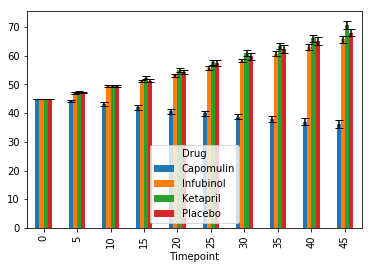

In [9]:
# Generate the Plot (with Error Bars)

# Save the Figure

fig, ax = plt.subplots()

meanTumor.plot.bar(yerr=stdErrTumor, ax=ax, capsize=4)

In [10]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [14]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [17]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()